## Lab 6 write-up  -- Aureliano Liu

In [2]:
%matplotlib inline
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)

### Problem 1

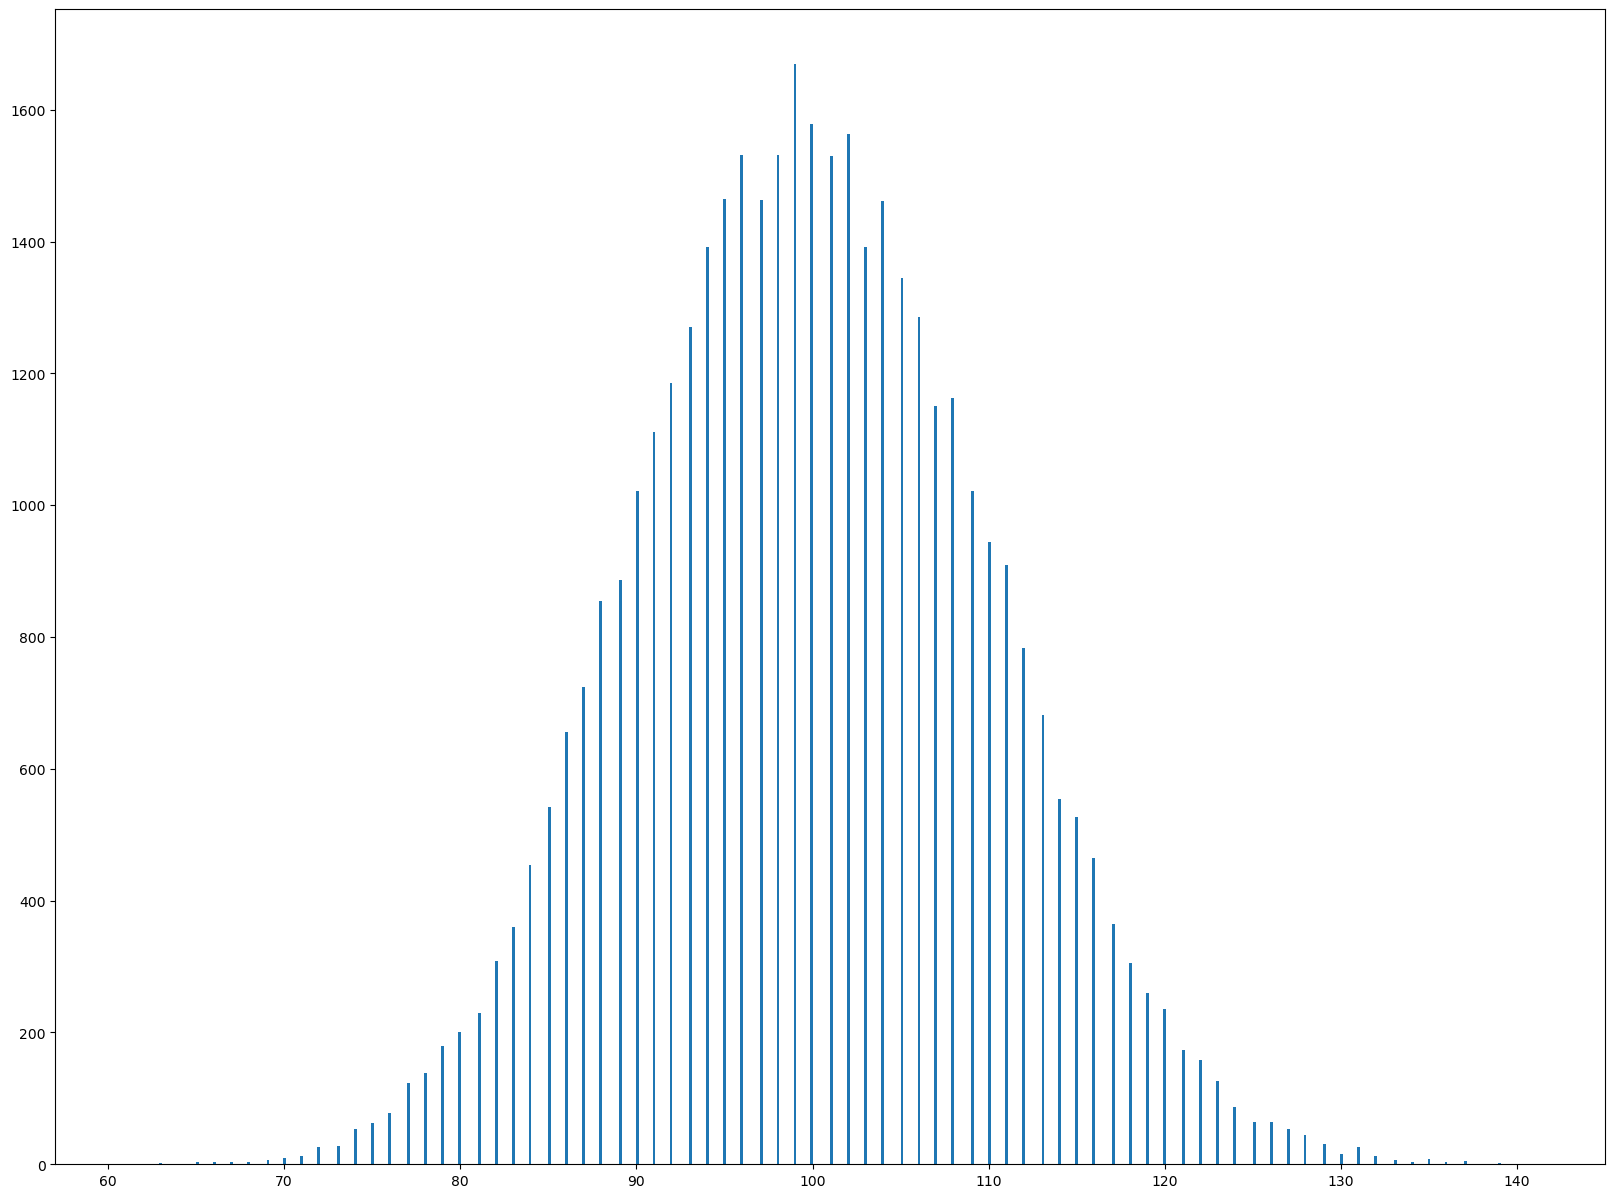

In [3]:
fig,ax = plt.subplots()
mu = 100
dist = np.random.poisson(mu,40000)
ax.hist(dist,bins=500);

In [46]:
sigma5 = 1/3.5e6
ppf = stats.poisson.ppf(1-sigma5,mu = mu)
print(f'the 5 sigma theshold of background is : {ppf}')

the 5 sigma theshold of background is : 154.0


### Problem 2

#### Part A

In [49]:
prob = stats.poisson.cdf(193,mu = mu)
ppf = stats.norm.ppf(prob)
print(ppf)

8.209536151601387


We inject 8.2 sigma 1000 times

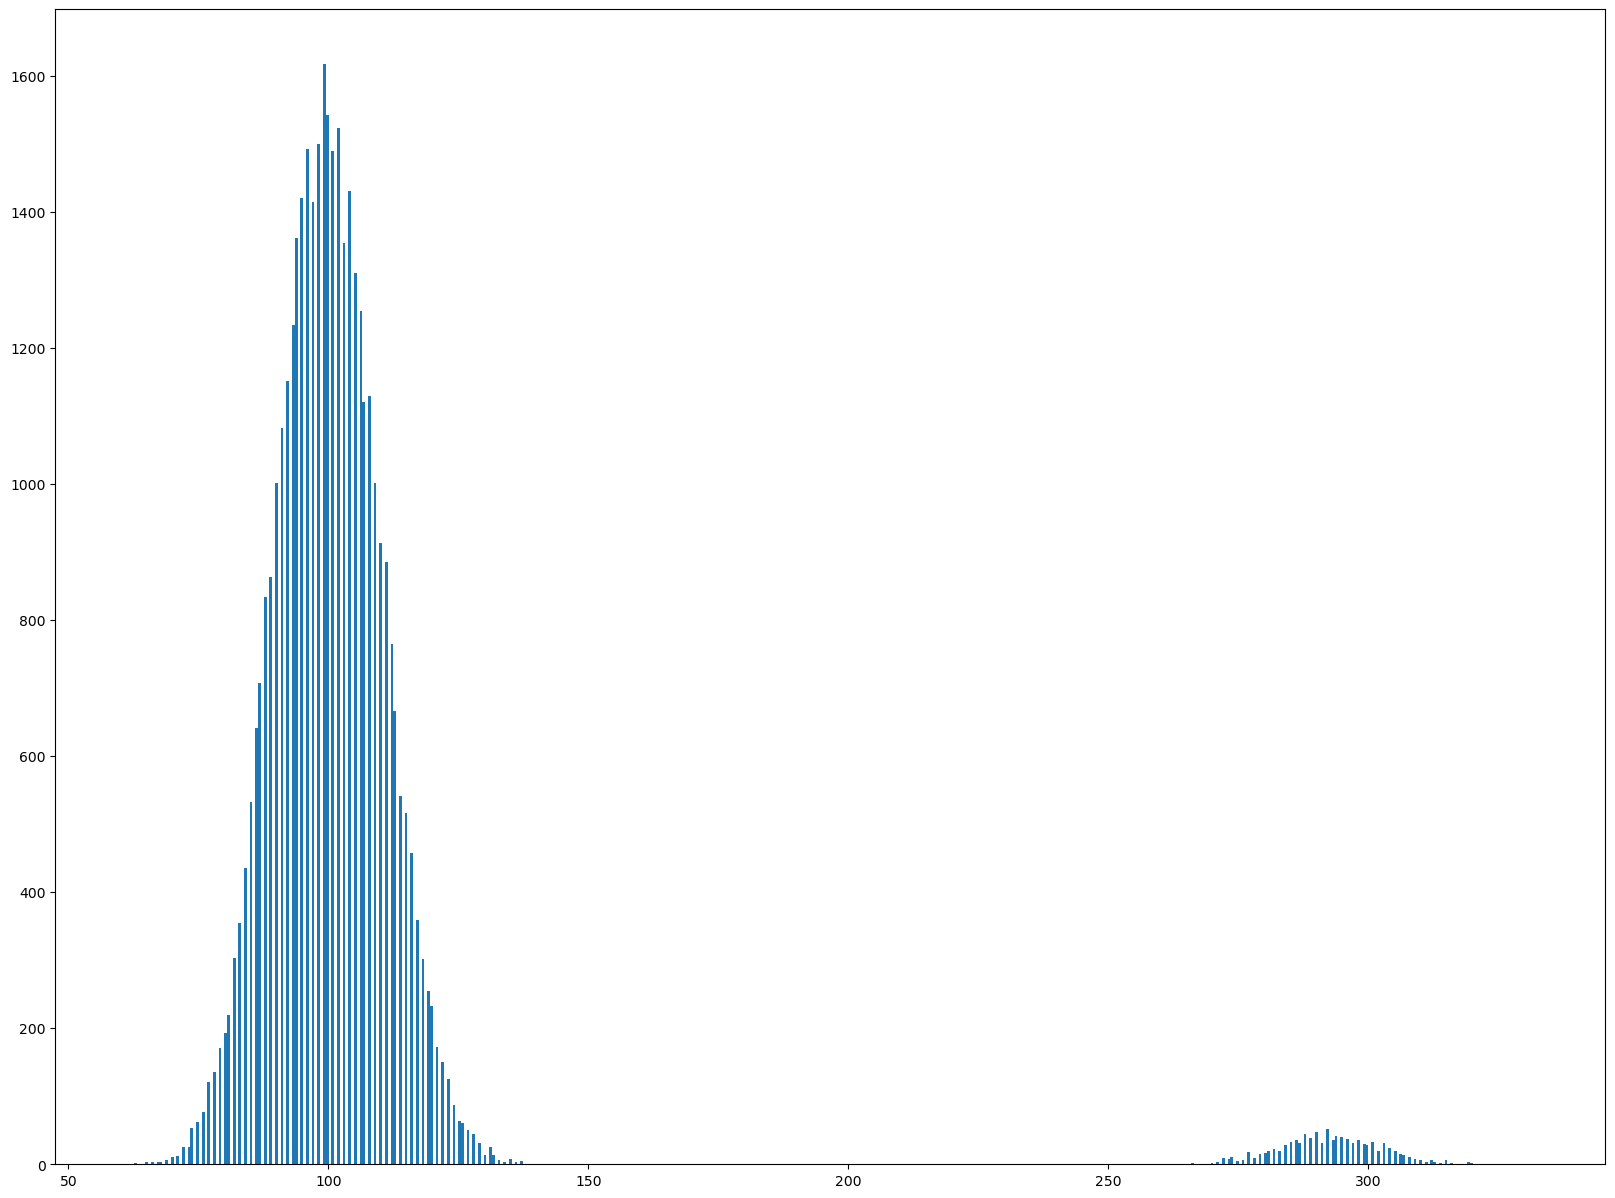

In [7]:
num = 1000
dist1 =dist.copy()
for i in range(0,num):
    dist1 [i] = dist[i] + 193
fig, ax = plt.subplots()
ax.hist(dist1,bins=500)
plt.show()

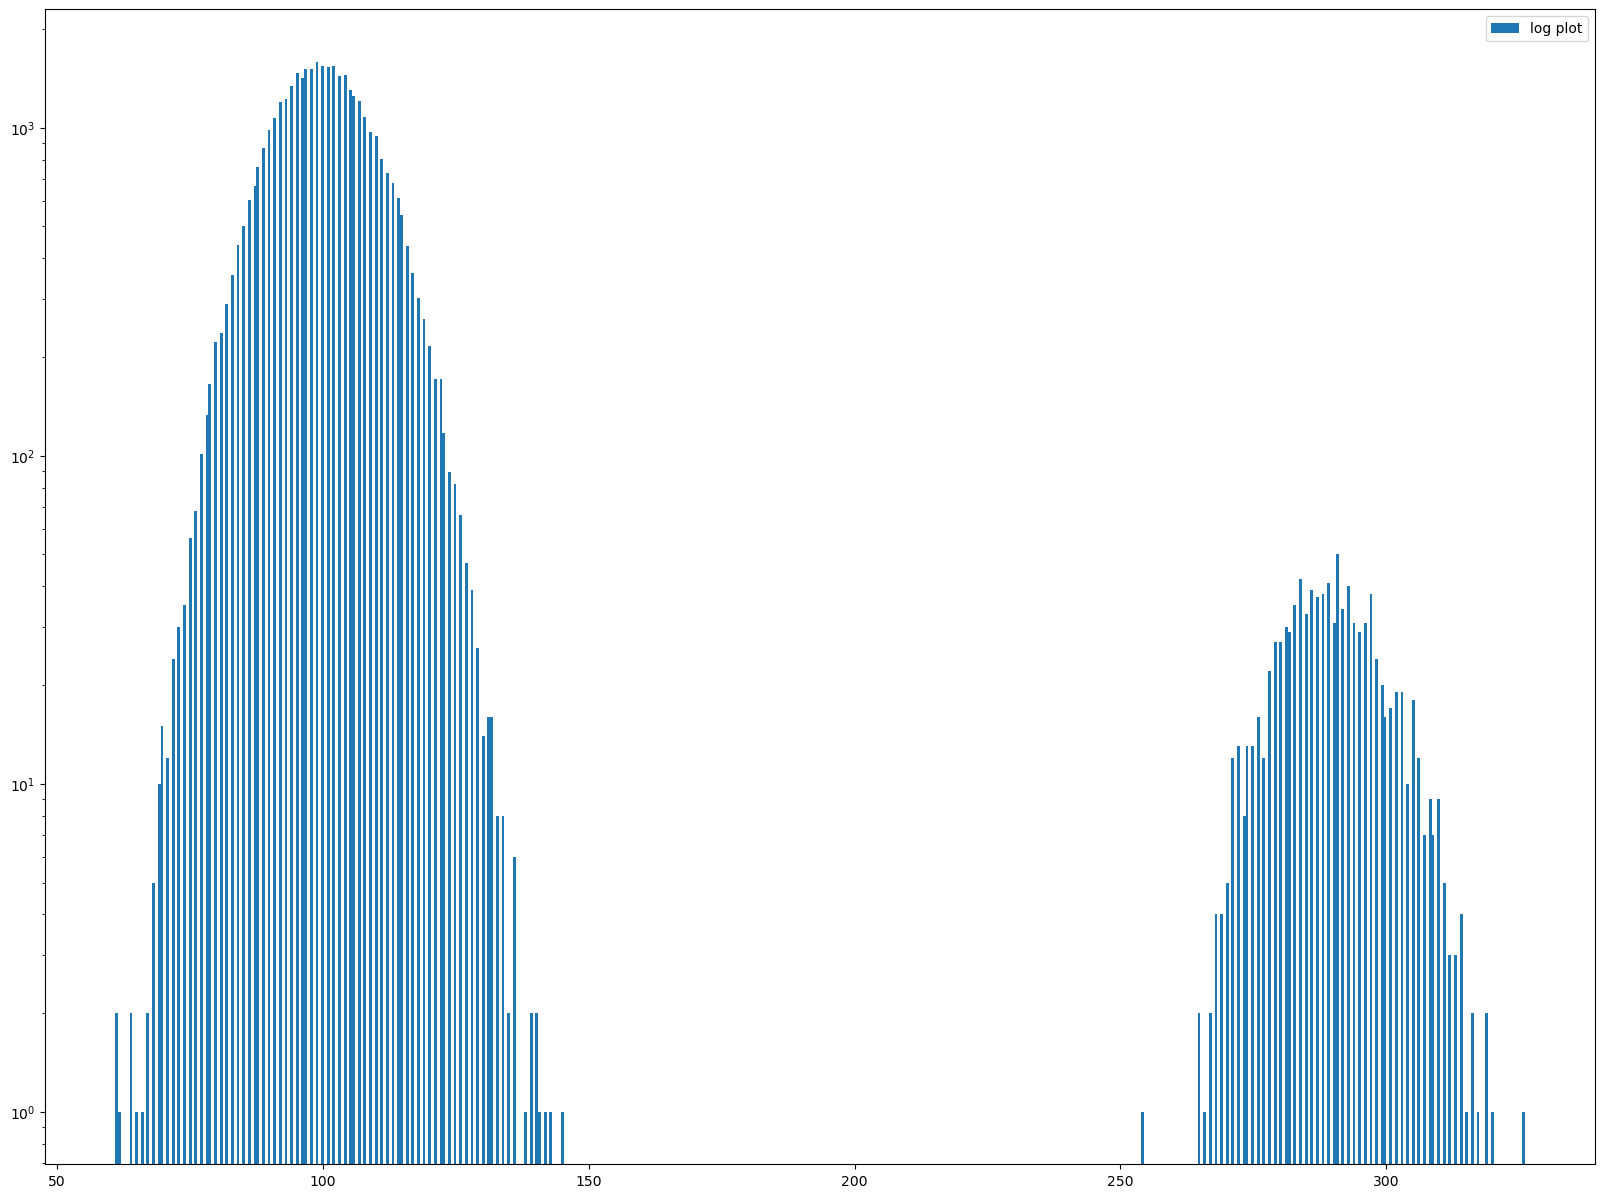

In [50]:
fig,ax = plt.subplots()
ax.hist(dist1,bins=500,label = "log plot")
ax.set_yscale('log')
ax.legend()
plt.show()

Since we only add 193 to 1000 points from 40000 samples, the brightness has the ratio of 1/40, which is the reason that the height of the right bump is much lower than the left one. 

#### Part B

It's also biased since the distribution is Poisson rather than Gaussian. Thus the distribution is insymmetrical. 

### Problem 3

#### Part A

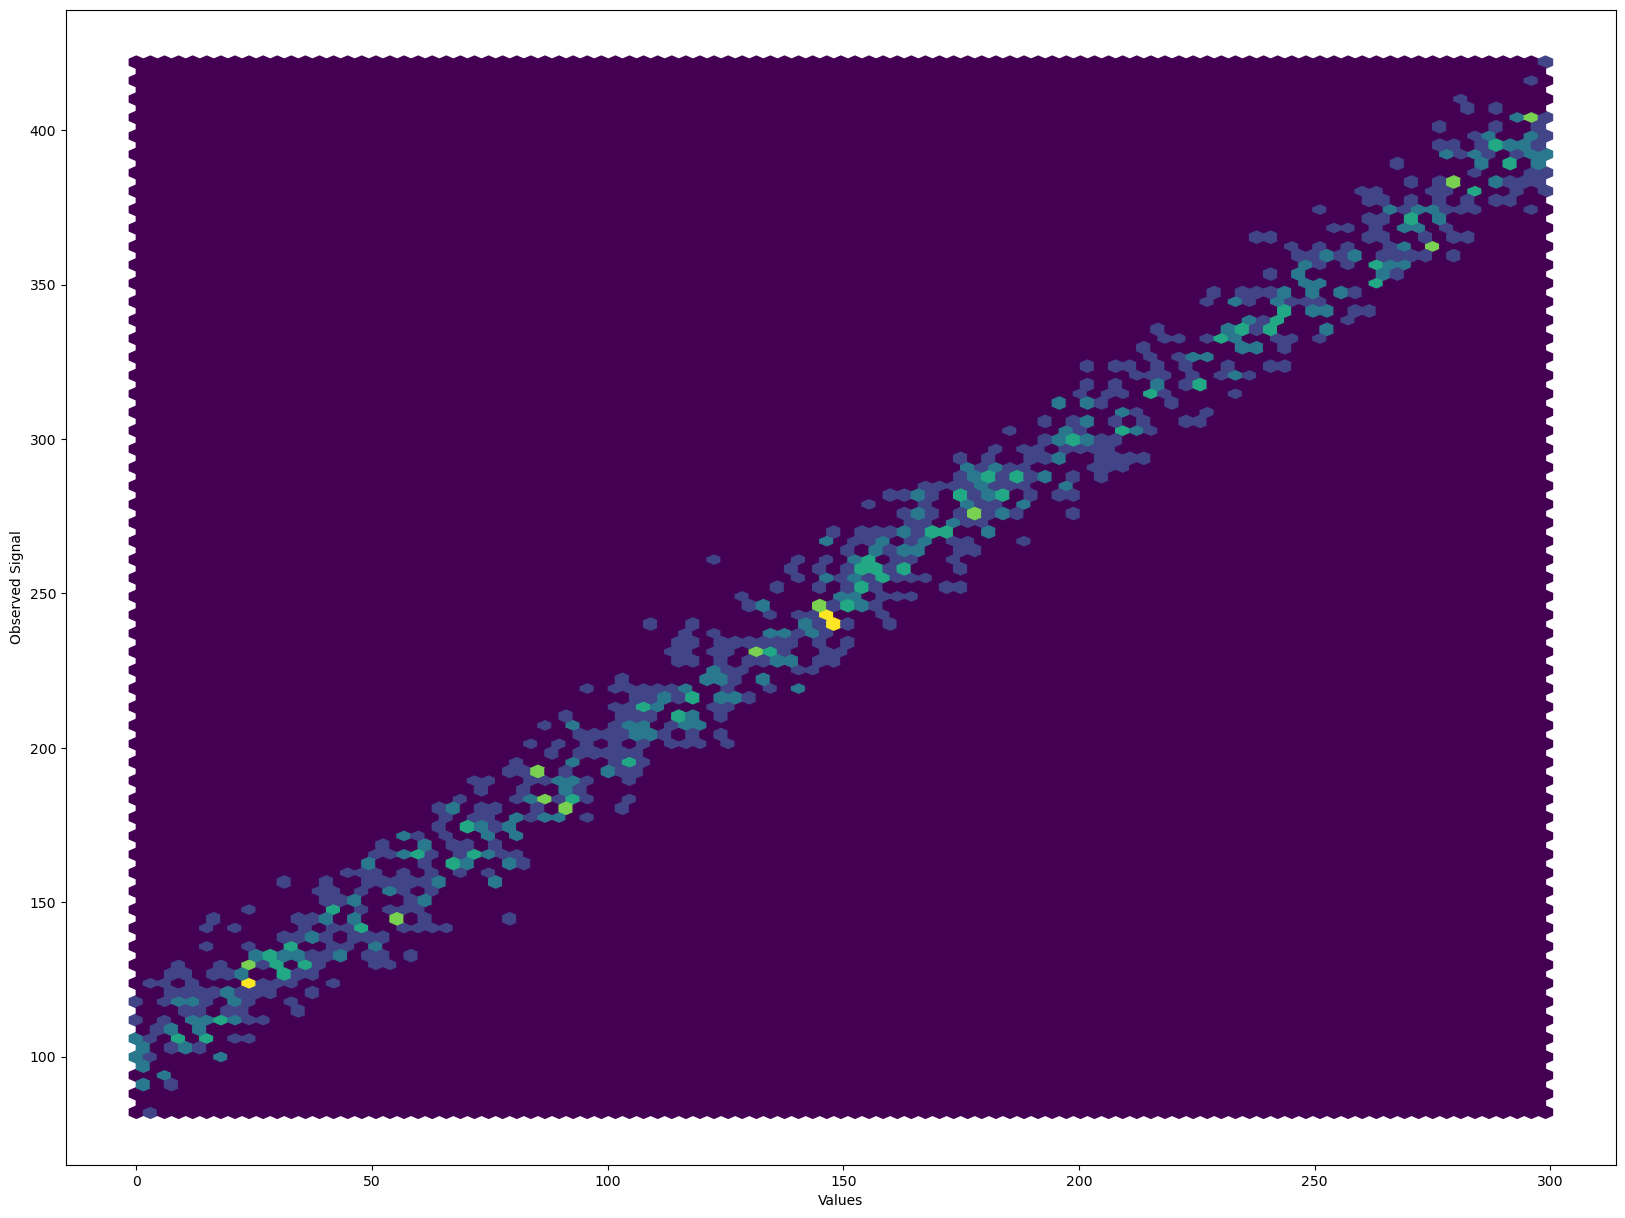

In [10]:
vals=[]
for i in range(0,1000):
    vals.append(np.random.randint(0,high=300))
    
distBadObs=[]
for i in range(0,1000):
    newDistVal=dist[i]+vals[i]
    distBadObs.append(newDistVal)
fig, ax = plt.subplots(1, 1, figsize=(20,15))
plt.hexbin(vals,distBadObs)
plt.xlabel("Values")
plt.ylabel("Observed Signal")
plt.show()

#### Part B

If we look carefully to the range of points when the x-component is 193( we can just look at 200 since 193 is too accurate to observe on the the graph), we can see that they range in a very similar way as what we see from the "bump" in problem 2

#### Part C

After reversing the question, our question now becomes to be : given some 2D histogram with injected signal and observed background, what would the injected signal be given some observed background? In other words, we are trying to find the x-compenent given y-compenent now. 

Assuming the background value is 300 in this case

From the plot below, we can see that the mean value of the 1D histogram centered at around 200

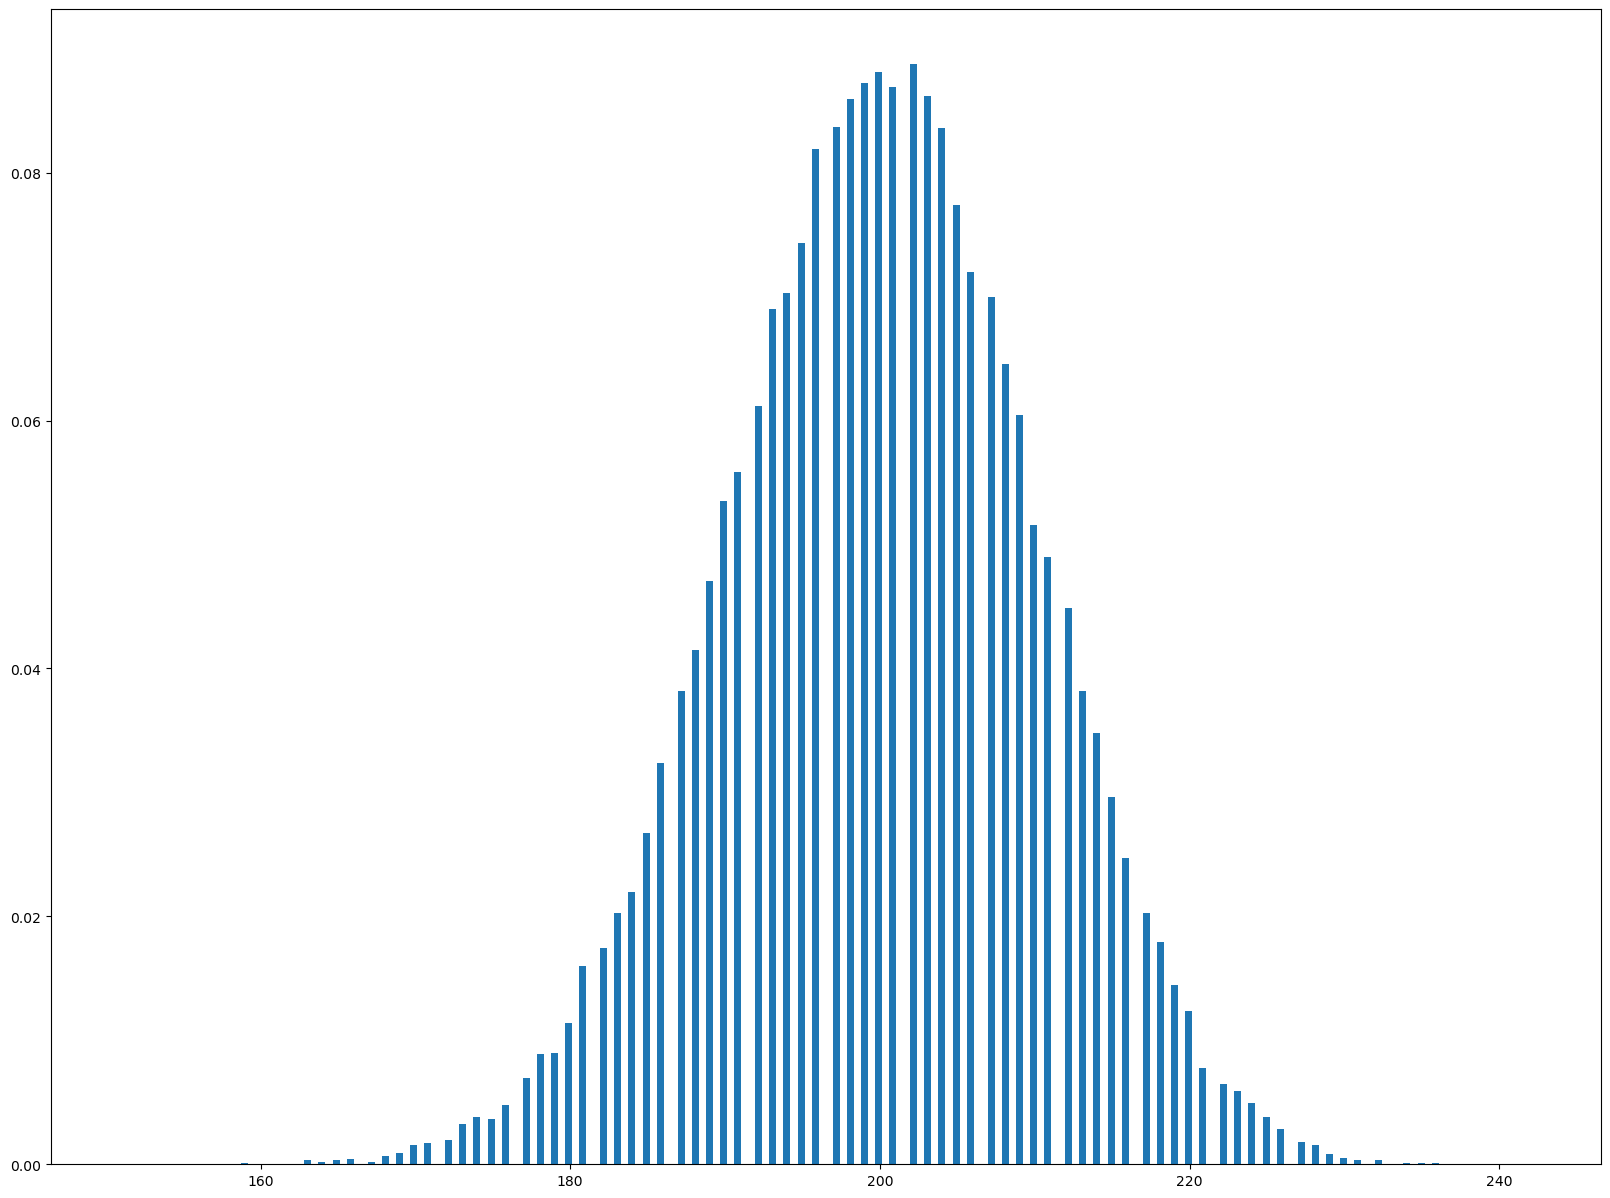

In [21]:
obs=[300]*40000
inject = obs - np.random.poisson(mu,40000)
fig, ax = plt.subplots()
ax.hist(inject,bins=200, density=True)
plt.show()

#### Part D

In [42]:
sigma1 = 0.84
det1 = stats.poisson.ppf(1 - sigma1,mu = 200)
print("det1 is : " + str(det1))
det2 = stats.poisson.ppf(sigma1,mu = 200)
print("det2 is : " + str(det2))
print(f"Upper bound sigma at a signal of 214: {stats.norm.ppf(stats.poisson.cdf(214,mu=200))}")
print(f"Lower bound sigma at a signal of 185: {stats.norm.ppf(stats.poisson.cdf(185,mu=200))}")

det1 is : 186.0
det2 is : 214.0
Upper bound sigma at a signal of 214: 1.0249290829677475
Lower bound sigma at a signal of 185: -1.0261440170048546


#### Part E

From the plot above, we can conclude that :
Even though the plot looks very symmetric, it's still Poisson distribution. It looks like Gaussian because of the central limit theorem. In fact, we have mean+15 as upper bound and mean-14 as lower bound, which infers insymmetry. 

## END of Lab 6